In [1]:
# from google.colab import drive
# drive.mount('/content/drive',force_remount=True)

In [2]:
# !pip install import-ipynb

In [3]:
import import_ipynb

In [4]:
# %cd /content/drive/MyDrive/A62_projet_synthese_feature/feature-colab-from-git/notebook

In [7]:
%run iteration_0_imports.py

In [8]:
%run iteration_0_parameters.py

In [9]:
import iteration_0_utils as utils

importing Jupyter notebook from iteration_0_utils.ipynb


In [10]:
%whos

Variable           Type      Data/Info
--------------------------------------
HEALTHY            str       H
IMG_SIZE           int       64
Image              module    <module 'PIL.Image' from <...>packages\\PIL\\Image.py'>
NBR_SAMPLE         int       20000
PATH_DATA          str       ../data
PATH_DATA_EDA      str       ../data/eda
PATH_DATA_LIST     str       ../data/list
PATH_DATA_SAMPLE   str       ../data/sample
PATH_MODEL         str       ../model
PATH_ROOT          str       ..
PATH_SOURCE_IMG    str       ../cell_images
SICK               str       S
cv2                module    <module 'cv2' from 'C:\\U<...>kages\\cv2\\__init__.py'>
datetime           type      <class 'datetime.datetime'>
glob               module    <module 'glob' from 'C:\\<...>anaconda3\\lib\\glob.py'>
gzip               module    <module 'gzip' from 'C:\\<...>anaconda3\\lib\\gzip.py'>
import_ipynb       module    <module 'import_ipynb' fr<...>ckages\\import_ipynb.py'>
np                 module    <mod

In [15]:
PATH_DATA_LIST

'../data/list'

In [16]:
df_path_img_sick = pd.read_csv(PATH_DATA_LIST + "/" + "df_list_path_sick_img.csv")
df_path_img_healthy = pd.read_csv(PATH_DATA_LIST + "/" + "df_list_path_healthy_img.csv")
df_path_img = pd.read_csv(PATH_DATA_LIST + "/" + "df_list_path_img.csv")

## Image moyenne par classe 

In [17]:
# get array from image
IMG_IN_COLOR = 1
def img_mean(df_path_img):
    img_arr_sum = np.zeros((400,400,3))
    for path_img, _ in zip(df_path_img.path_img, tqdm(range(len(df_path_img.path_img)))):
        img_arr = cv2.imread(path_img, flags = IMG_IN_COLOR)

        img_arr_sum[:img_arr.shape[0],:img_arr.shape[1],:] += img_arr 
    
    return img_arr_sum / df_path_img.shape[0]
            

In [18]:
img_mean_healthy =  img_mean(df_path_img_healthy)

100%|█████████▉| 13778/13779 [01:56<00:00, 118.57it/s]


In [19]:
img_mean_sick =  img_mean(df_path_img_sick)

100%|█████████▉| 13778/13779 [01:25<00:00, 160.86it/s]


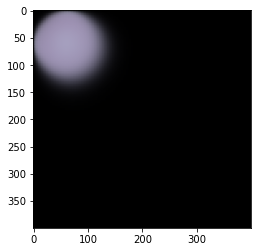

In [20]:
plt.imshow(img_mean_healthy.astype(np.uint8))

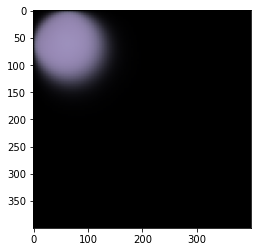

In [21]:
plt.imshow(img_mean_sick.astype(np.uint8))

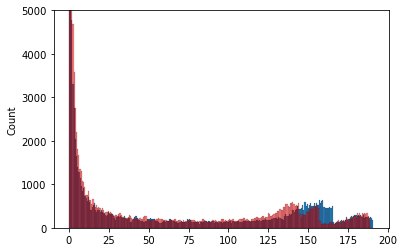

In [22]:
sns.histplot(img_mean_healthy.ravel(), bins = 256, alpha = 0.95)
sns.histplot(img_mean_sick.ravel(), bins = 256, color = "r",alpha = 0.5)
plt.ylim(0,5000)
plt.show()

In [23]:
PATH_DATA_EDA

'../data/eda'

In [24]:
os.makedirs(PATH_DATA_EDA, exist_ok=True)

In [26]:
# https://www.thoughtco.com/using-pickle-to-save-objects-2813661
utils.pickle_save(img_mean_healthy, PATH_DATA_EDA + "/" + "img_mean_healthy.pklz")
utils.pickle_save(img_mean_sick, PATH_DATA_EDA + "/" + "img_mean_sick.pklz")

## Histogramme des pixels non nuls pour chaque image et par classe

In [134]:
def pixel_count(df_path_img: pd.DataFrame) -> np.array:
    result = np.zeros((len(df_path_img.path_img),4))
    for i, path_img in enumerate(tqdm(df_path_img.path_img)):
        img_arr = cv2.imread(path_img, flags = IMG_IN_COLOR)
        
        result[i,0] = i
        result[i,1] = np.count_nonzero(img_arr == 0)
        result[i,2] = np.count_nonzero(img_arr != 0)
        result[i,3] = len(img_arr.ravel())

    return result

In [136]:
pixel_count_healthy = pixel_count(df_path_img_healthy)


100%|██████████| 13779/13779 [00:17<00:00, 795.48it/s]


In [135]:
pixel_count_sick = pixel_count(df_path_img_sick)

100%|██████████| 13779/13779 [00:18<00:00, 744.55it/s]


In [152]:
df_pixel_count_healthy = pd.DataFrame(pixel_count_healthy)
df_pixel_count_healthy["label"] = "healthy"
df_pixel_count_sick = pd.DataFrame(pixel_count_sick)
df_pixel_count_sick["label"] = "sick"

In [153]:
df_pixel_count = pd.concat([df_pixel_count_healthy, df_pixel_count_sick], ignore_index = True)

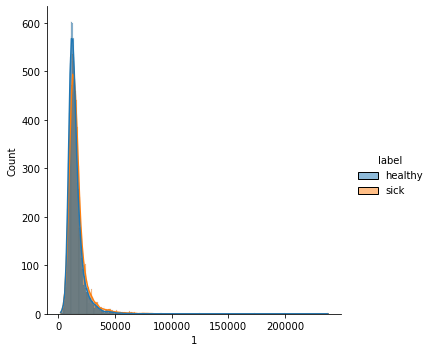

In [169]:
sns.displot(data = df_pixel_count, x = df_pixel_count[1], kde = True, hue = "label", )

In [177]:
df_pixel_count["pct"] = df_pixel_count[1] / df_pixel_count[3]

In [180]:
df_pixel_count.describe()

,0,1,2,3,pct
count,27558.00000,27558.000000,27558.000000,27558.000000,27558.000000
mean,6889.00000,15567.353473,37939.915632,53507.269105,0.283725
std,3977.72684,7553.929749,8987.182130,14902.714162,0.060674
min,0.00000,2079.000000,3549.000000,6600.000000,0.137298
25%,3444.25000,11286.000000,32160.000000,44202.000000,0.243389
50%,6889.00000,13915.500000,37596.000000,51870.000000,0.269947
75%,10333.75000,17550.000000,43212.000000,60465.000000,0.307870
max,13778.00000,237918.000000,133362.000000,371280.000000,0.700131


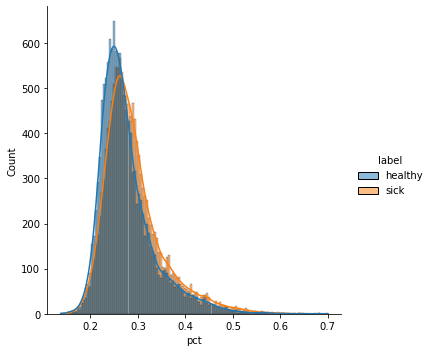

In [182]:
sns.displot(data = df_pixel_count, x = df_pixel_count["pct"], kde = True, hue = "label", )